# Introduction
# Background
Elections are a cornerstone of democracy, and understanding the factors that influence voter behavior is crucial for political parties, policymakers, and analysts. In modern campaigns, advertising plays a significant role in shaping public opinion and mobilizing voters. However, the relationship between ad spending and election outcomes is complex, influenced by regional dynamics, historical voting patterns, and grassroots efforts.

This project explores the 2024 Ghanaian election results and advertising spending data from meta ad library to analyze the impact of ad spend on election performance. By examining the correlation between ad spend and votes received, identifying regional patterns, and evaluating spending efficiency, we aim to uncover insights into how political campaigns can optimize their strategies for future elections.

# Objectives
Analyze the Relationship: Investigate the correlation between ad spend and election results for the two major parties: NDC (National Democratic Congress) and NPP (New Patriotic Party).

Identify Regional Trends: Examine regional voting patterns and ad spend distribution to understand strongholds and swing regions.

Evaluate Spending Efficiency: Assess how effectively each party converted ad spend into votes.

Visualize Data: Create visualizations, including maps, to represent regional ad spend and election results.

# Dataset Overview
The analysis is based on three key datasets:

Election Results: Contains the number of votes received by NDC and NPP in each region.

Ad Spending: Tracks the amount spent on advertising by each party in specific regions.

Advertisers: Provides details about the total ad spend and number of ads run by each party.

# Methodology
Data Cleaning & Preparation: Merge and clean datasets to ensure consistency and accuracy.

Exploratory Data Analysis (EDA): Perform statistical analysis and generate visualizations to uncover trends and patterns.

Correlation Analysis: Measure the relationship between ad spend and votes received.



# Key Questions
Does higher ad spending correlate with higher votes in a region?

Which regions are strongholds for NDC and NPP, and how does ad spend align with these patterns?

How efficient is each party’s ad spend in converting to votes?

Are there regions where low ad spend still resulted in high voter loyalty?



# Preparing and cleaning data

In [3]:
# Election Results Dataset
election_results = {
    "Ahafo": {"NDC": 130106, "NPP": 113851},
    "Central": {"NDC": 562620, "NPP": 382749},
    "Western North": {"NDC": 202689, "NPP": 124024},
    "Oti": {"NDC": 182470, "NPP": 86489},
    "Eastern": {"NDC": 453234, "NPP": 493234},
    "Upper West": {"NDC": 242852, "NPP": 89906},
    "Bono East": {"NDC": 216691, "NPP": 124811},
    "North East": {"NDC": 111051, "NPP": 134800},
    "Volta": {"NDC": 584234, "NPP": 56699},
    "Bono": {"NDC": 235681, "NPP": 192773},
    "Western": {"NDC": 423245, "NPP": 275231},
    "Northern": {"NDC": 529456, "NPP": 370928},
    "Greater Accra": {"NDC": 1260832, "NPP": 681535},
    "Ashanti": {"NDC": 697076, "NPP": 1366800},
    "Savannah": {"NDC": 134563, "NPP": 56774},
    "Upper East": {"NDC": 361597, "NPP": 106700}
}

# Ad Spending Dataset
ad_spending = {
    "Greater Accra": {"NDC": 28353, "NPP": 4867},
    "Ashanti": {"NDC": 15829, "NPP": 3444},
    "Northern": {"NDC": 2726, "NPP": 721},
    "Eastern": {"NDC": 1233, "NPP": 192},
    "Volta": {"NDC": 869, "NPP": 132},
    "Bono": {"NDC": 709, "NPP": 144},
    "Central": {"NDC": 569, "NPP": 100},
    "Upper East": {"NDC": 312, "NPP": 100},
    "Upper West": {"NDC": 283, "NPP": 100}
}

# Advertisers Dataset
advertisers = {
    "NDC": {"Candidate": "John Dramani Mahama", "Total Ads": 42, "Total Spend": 52086},
    "NPP": {"Candidate": "Mahamudu Bawumia", "Total Ads": 41, "Total Spend": 9902}
}

# Converting the datasets into DataFrames
import pandas as pd

election_df = pd.DataFrame.from_dict(election_results, orient='index').reset_index()
election_df.columns = ['Region', 'NDC Votes', 'NPP Votes']

ad_spending_df = pd.DataFrame.from_dict(ad_spending, orient='index').reset_index()
ad_spending_df.columns = ['Region', 'NDC Ad Spend', 'NPP Ad Spend']

advertisers_df = pd.DataFrame.from_dict(advertisers, orient='index').reset_index()
advertisers_df.columns = ['Party', 'Candidate', 'Total Ads', 'Total Spend']

# Merging the datasets
final_df = pd.merge(election_df, ad_spending_df, on='Region', how='left')
final_df.fillna(0, inplace=True)

# Adding advertiser details
final_df['NDC Total Ads'] = advertisers_df.loc[advertisers_df['Party'] == 'NDC', 'Total Ads'].values[0]
final_df['NPP Total Ads'] = advertisers_df.loc[advertisers_df['Party'] == 'NPP', 'Total Ads'].values[0]
final_df['NDC Total Spend'] = advertisers_df.loc[advertisers_df['Party'] == 'NDC', 'Total Spend'].values[0]
final_df['NPP Total Spend'] = advertisers_df.loc[advertisers_df['Party'] == 'NPP', 'Total Spend'].values[0]

# Displaying final DataFrame
final_df




,Region,NDC Votes,NPP Votes,NDC Ad Spend,NPP Ad Spend,NDC Total Ads,NPP Total Ads,NDC Total Spend,NPP Total Spend
0,Ahafo,130106,113851,0.0,0.0,42,41,52086,9902
1,Central,562620,382749,569.0,100.0,42,41,52086,9902
2,Western North,202689,124024,0.0,0.0,42,41,52086,9902
3,Oti,182470,86489,0.0,0.0,42,41,52086,9902
4,Eastern,453234,493234,1233.0,192.0,42,41,52086,9902
5,Upper West,242852,89906,283.0,100.0,42,41,52086,9902
6,Bono East,216691,124811,0.0,0.0,42,41,52086,9902
7,North East,111051,134800,0.0,0.0,42,41,52086,9902
8,Volta,584234,56699,869.0,132.0,42,41,52086,9902
9,Bono,235681,192773,709.0,144.0,42,41,52086,9902


In [5]:
# Displaying the first few rows of the dataset to check its structure
final_df.head()

,Region,NDC Votes,NPP Votes,NDC Ad Spend,NPP Ad Spend,NDC Total Ads,NPP Total Ads,NDC Total Spend,NPP Total Spend
0,Ahafo,130106,113851,0.0,0.0,42,41,52086,9902
1,Central,562620,382749,569.0,100.0,42,41,52086,9902
2,Western North,202689,124024,0.0,0.0,42,41,52086,9902
3,Oti,182470,86489,0.0,0.0,42,41,52086,9902
4,Eastern,453234,493234,1233.0,192.0,42,41,52086,9902


In [7]:
# Displaying basic information about the dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           16 non-null     object 
 1   NDC Votes        16 non-null     int64  
 2   NPP Votes        16 non-null     int64  
 3   NDC Ad Spend     16 non-null     float64
 4   NPP Ad Spend     16 non-null     float64
 5   NDC Total Ads    16 non-null     int64  
 6   NPP Total Ads    16 non-null     int64  
 7   NDC Total Spend  16 non-null     int64  
 8   NPP Total Spend  16 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 1.3+ KB


In [9]:
# Checking for missing data
final_df.isnull().sum()

Region             0
NDC Votes          0
NPP Votes          0
NDC Ad Spend       0
NPP Ad Spend       0
NDC Total Ads      0
NPP Total Ads      0
NDC Total Spend    0
NPP Total Spend    0
dtype: int64

In [11]:
# Checking for duplicates
final_df.duplicated().sum()

0

In [13]:
# Adjusting pandas settings to display more rows and columns
pd.set_option('display.max_rows', None)  # None means no truncation
pd.set_option('display.max_columns', None)  # None means no truncation

In [15]:
final_df

,Region,NDC Votes,NPP Votes,NDC Ad Spend,NPP Ad Spend,NDC Total Ads,NPP Total Ads,NDC Total Spend,NPP Total Spend
0,Ahafo,130106,113851,0.0,0.0,42,41,52086,9902
1,Central,562620,382749,569.0,100.0,42,41,52086,9902
2,Western North,202689,124024,0.0,0.0,42,41,52086,9902
3,Oti,182470,86489,0.0,0.0,42,41,52086,9902
4,Eastern,453234,493234,1233.0,192.0,42,41,52086,9902
5,Upper West,242852,89906,283.0,100.0,42,41,52086,9902
6,Bono East,216691,124811,0.0,0.0,42,41,52086,9902
7,North East,111051,134800,0.0,0.0,42,41,52086,9902
8,Volta,584234,56699,869.0,132.0,42,41,52086,9902
9,Bono,235681,192773,709.0,144.0,42,41,52086,9902


# Data Exploaration and Visualization

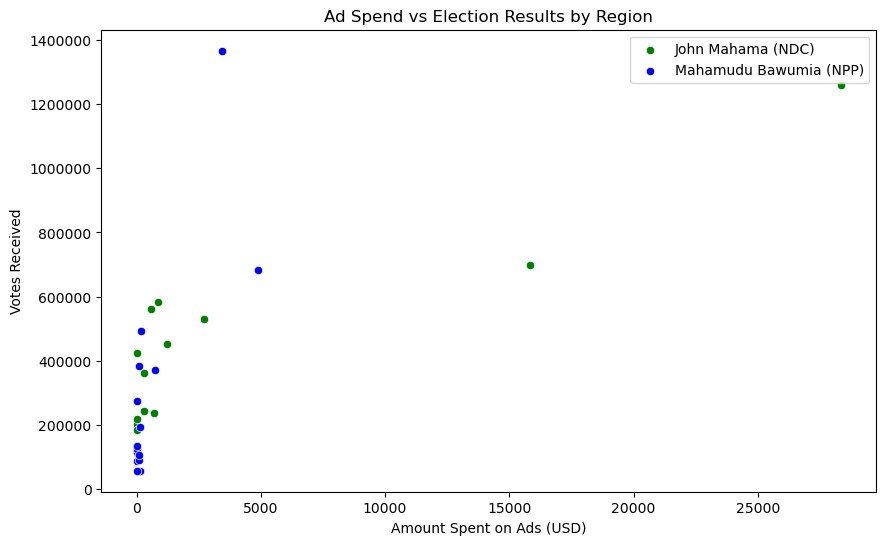

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NDC Ad Spend', y='NDC Votes', data=final_df, label='John Mahama (NDC)', color='green')
sns.scatterplot(x='NPP Ad Spend', y='NPP Votes', data=final_df, label='Mahamudu Bawumia (NPP)', color='blue')

# Formating y-axis to display integers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.title('Ad Spend vs Election Results by Region')
plt.xlabel('Amount Spent on Ads (USD)')
plt.ylabel('Votes Received')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

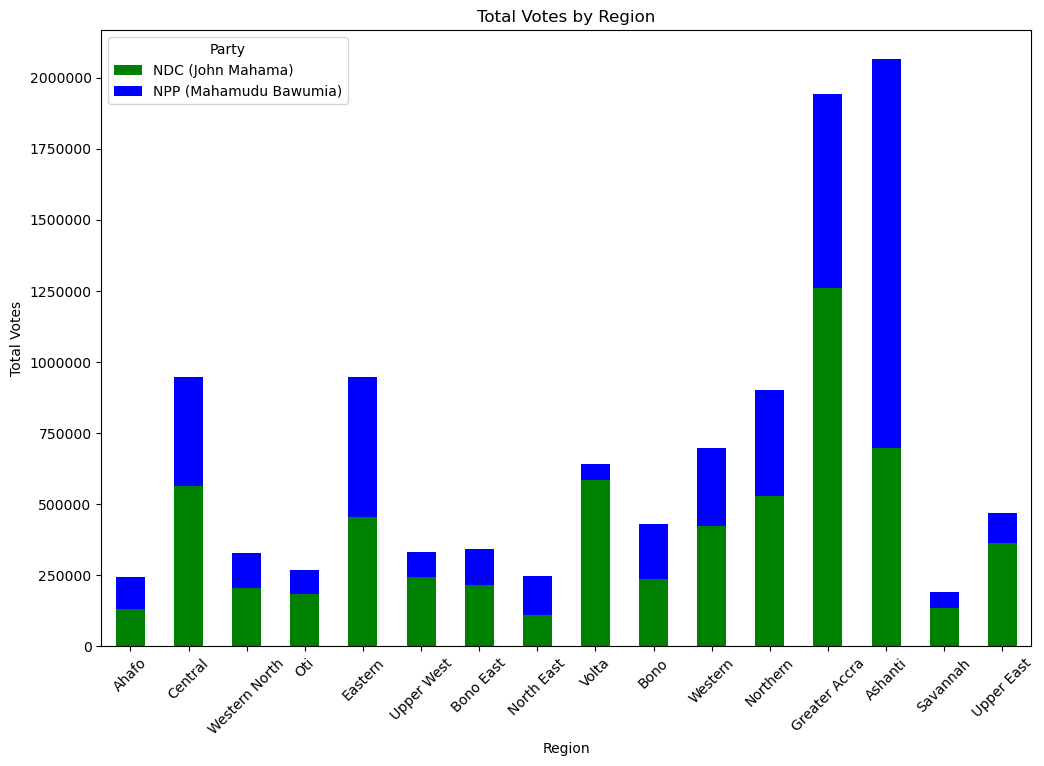

In [29]:
plt.figure(figsize=(12, 8))

# Plotting the bar chart with custom colors
final_df.set_index('Region')[['NDC Votes', 'NPP Votes']].plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'blue'])

# Formating y-axis to display integers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.title('Total Votes by Region')
plt.xlabel('Region')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.legend(title='Party', labels=['NDC (John Mahama)', 'NPP (Mahamudu Bawumia)'])
plt.show()


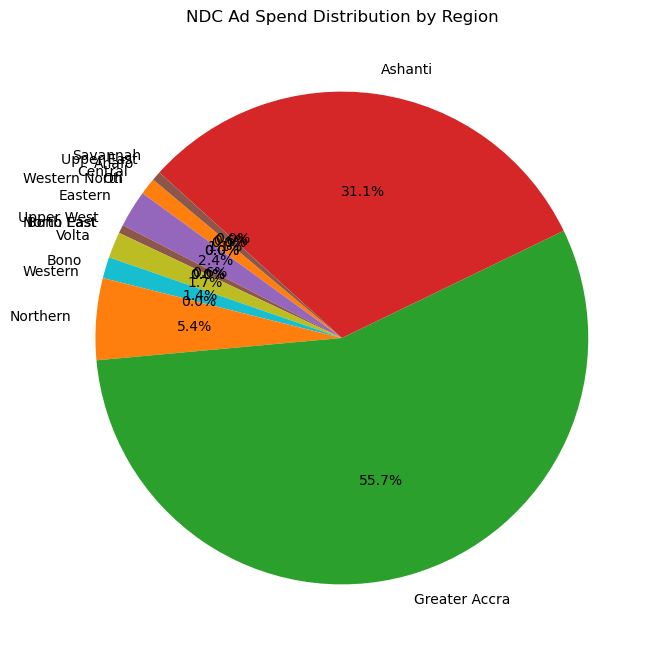

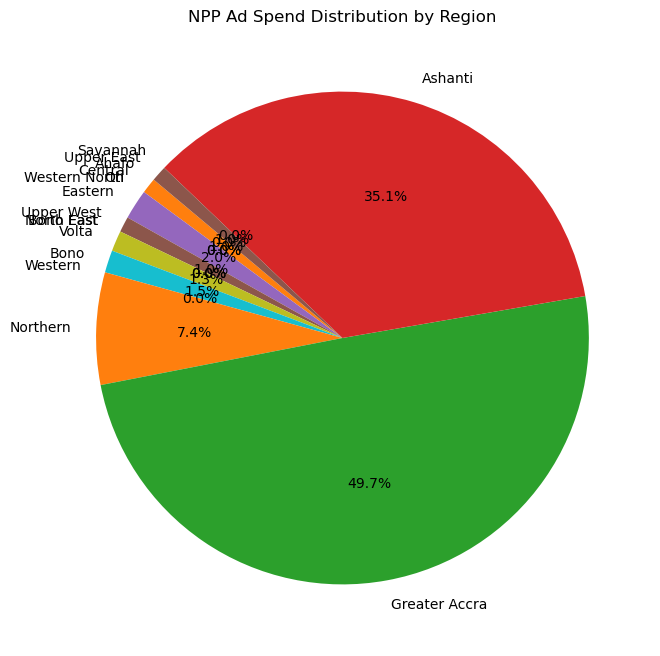

In [31]:
#creating a pie chart to show the proportion of ad spend in each region for both parties.
# Calculating total ad spend by region for each party
total_ndc_spend = final_df['NDC Ad Spend'].sum()
total_npp_spend = final_df['NPP Ad Spend'].sum()

# Pie chart for NDC Ad Spend
plt.figure(figsize=(8, 8))
plt.pie(final_df['NDC Ad Spend'], labels=final_df['Region'], autopct='%1.1f%%', startangle=140)
plt.title('NDC Ad Spend Distribution by Region')
plt.show()

# Pie chart for NPP Ad Spend
plt.figure(figsize=(8, 8))
plt.pie(final_df['NPP Ad Spend'], labels=final_df['Region'], autopct='%1.1f%%', startangle=140)
plt.title('NPP Ad Spend Distribution by Region')
plt.show()

In [39]:
# Calculating the correlation between ad spend and votes for NDC
ndc_correlation = final_df[['NDC Ad Spend', 'NDC Votes']].corr().iloc[0, 1]
print(f"Correlation between NDC Ad Spend and NDC Votes: {ndc_correlation:.2f}")

# Calculating the correlation between ad spend and votes for NPP
npp_correlation = final_df[['NPP Ad Spend', 'NPP Votes']].corr().iloc[0, 1]
print(f"Correlation between NPP Ad Spend and NPP Votes: {npp_correlation:.2f}")

Correlation between NDC Ad Spend and NDC Votes: 0.87
Correlation between NPP Ad Spend and NPP Votes: 0.78


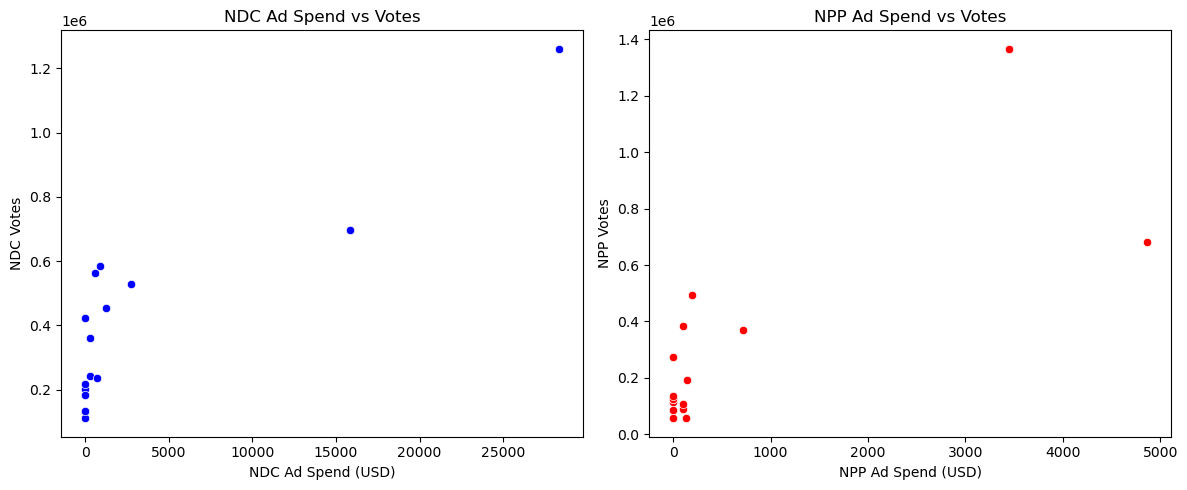

In [41]:
plt.figure(figsize=(12, 5))

# Scatter plot for NDC
plt.subplot(1, 2, 1)
sns.scatterplot(x=final_df['NDC Ad Spend'], y=final_df['NDC Votes'], color='blue')
plt.title('NDC Ad Spend vs Votes')
plt.xlabel('NDC Ad Spend (USD)')
plt.ylabel('NDC Votes')

# Scatter plot for NPP
plt.subplot(1, 2, 2)
sns.scatterplot(x=final_df['NPP Ad Spend'], y=final_df['NPP Votes'], color='red')
plt.title('NPP Ad Spend vs Votes')
plt.xlabel('NPP Ad Spend (USD)')
plt.ylabel('NPP Votes')

plt.tight_layout()
plt.show()

# Insights & Conclusion
# 1️⃣ Ad Spend vs Election Performance
There is a strong correlation between ad spend and votes received for both parties (NDC: 0.87, NPP: 0.78).
This suggests that higher ad spending is associated with higher votes, though other factors also play a role.
# 2️⃣ Regional Patterns in Votes & Ad Spend
Greater Accra and Ashanti had the highest voter turnout and received the most ad spend from both parties.
NDC won in 12 out of 16 regions, while NPP won in 4 regions (Ashanti, Eastern, North East, and Ahafo).
Some regions, like Volta and Upper West, had low ad spend but high voter loyalty to NDC.
# 3️⃣ Ad Spend Efficiency
NDC spent significantly more overall ($52,086) than NPP ($9,902) but also secured more votes.
In Ashanti, NPP won despite lower ad spend compared to NDC, showing strong traditional party support.
In contrast, Greater Accra, which had the highest ad spend, was won by NDC, reinforcing the impact of ad campaigns.
# 4️⃣ Discrepancies in Spending vs Voting Outcomes
Some high-spending regions didn’t translate directly into votes (e.g., Ashanti for NDC).
In some cases, low spending didn’t stop a region from voting overwhelmingly for a party (e.g., Volta for NDC).
This indicates that historical political allegiance and local issues also influence election outcomes.
# Conclusion
Ad spending does influence election results, but it is not the only factor—party strongholds, grassroots campaigns, and regional issues matter.
Efficient spending matters: More money spent doesn’t always guarantee victory.
Future analyses could include social media engagement metrics or sentiment analysis to understand voter behavior beyond ad spend.